In [1]:
% pylab inline
import numpy as np
import os.path
import scipy.fftpack as ft

Populating the interactive namespace from numpy and matplotlib


In [2]:
archivo= np.genfromtxt('monthrg.dat',usecols=(0,1,3)) # importa  el archivo usando las columnas del año mes  y promedio d e manchas  solares

In [5]:
archivo=archivo[archivo[:,2]>=0] #solo  toma los valores positivos eliminando los  blancos de data
archivo[:,0]+=(archivo[:,1]/12.0) #agrega el mes  a la columna de año (dejandolo en decimales)
# se  toman las columnas de x(tiempo), y (promedio de manchas solares)
tiempo=archivo[:,0] 
dato=archivo[:,2]

(1900, 2000)

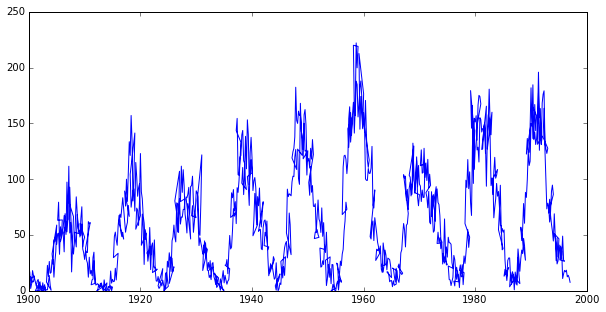

In [11]:
fig = plt.figure(figsize=(10,5))
plot(tiempo , dato) 

#plt.title('Datos original Vs tiempo en años')
#plt.xlabel('Tiempo en años')
#plt.ylabel('Promedio manchas solares')

xlim([1900,2000]) # solo muestra la gràfica entre 1900 y el 2000

Este es  el  nuevo máximo == periodo => 10.4168824221
El  original es  de 11 años 


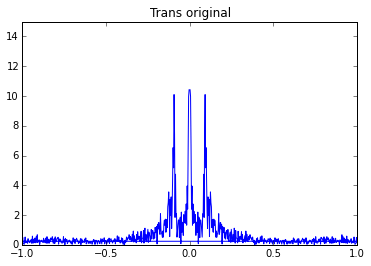

In [13]:
fou=np.absolute(ft.fft(dato)/len(tiempo)) # saca la trasnformada de datos
w=ft.fftfreq(len(dato),1.0/12) # saca las frecuencia de la  transformada 
# con el siguiente paso se quita el máximo del 0
mx = np.max(fou) # saca el máximo de la función
donde = fou<mx
fou=fou[donde]
w=w[donde]

plot(w, fou)
plt.xlim([-1,1])
nuevomx = np.max(fou)
plt.ylim([0,15])
plt.title('Trans original')
print 'Este es  el  nuevo máximo == periodo =>',nuevomx
print 'El  original es  de 11 años '